In [2]:
import pandas as pd
import numpy as np 
#%matplotlib widget
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns  
import scipy.stats as sta
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load and Clean data

In [3]:
df = pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Convert TotalCharges column to numeric

In [6]:
def convert_to_numeric (feature) :
    df[feature] =pd.to_numeric(df[feature], errors = 'coerce')
    
convert_to_numeric('TotalCharges')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.drop(['customerID'], axis =1, inplace=True)

In [9]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


## missing value treatment

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df.loc[:, 'TotalCharges'] = imputer.fit_transform(df.loc[:, 'TotalCharges'].values.reshape(-1,1))

In [11]:
print(df.isnull().values.any())
df.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [13]:
df.drop(labels=df[df["tenure"] == 0].index, axis = 0, inplace = True)

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Categorize Features to categorical values and continuous values

In [15]:
df.SeniorCitizen = df.SeniorCitizen.astype('str')
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]

## EDA

Churn
No     5163
Yes    1869
dtype: int64


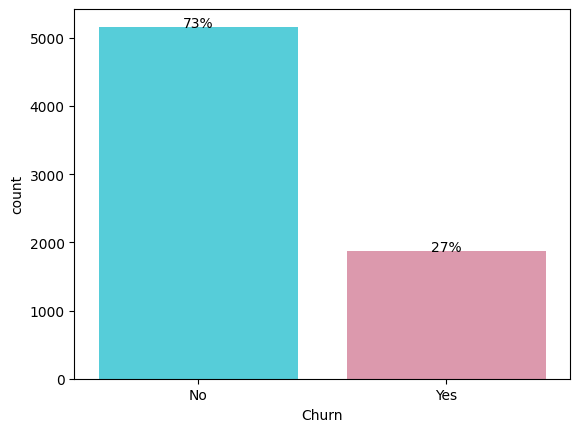

In [16]:
print(df.groupby(['Churn']).size())
color_0_1 = ('#40DFEF', '#E78EA9')
churn_plot = sns.countplot(data=df, x='Churn',palette=color_0_1)#, order=df.Churn.value_counts().index)
for p in churn_plot.patches :
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2, height, '{0:.0%}'.format(height/len(df)), ha='center')
plt.show()

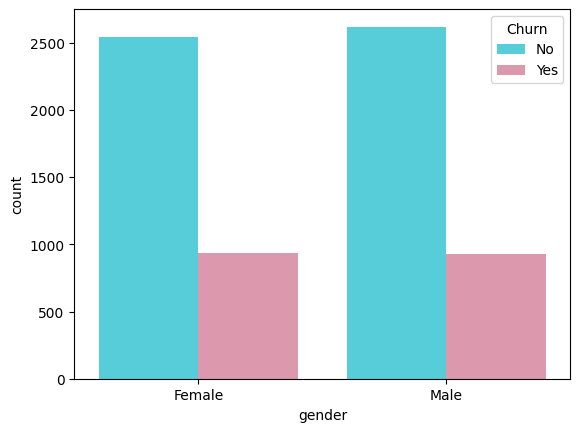

In [17]:
gender_churn_plot = sns.countplot(data=df, x='gender', hue='Churn',palette=color_0_1)
plt.show()

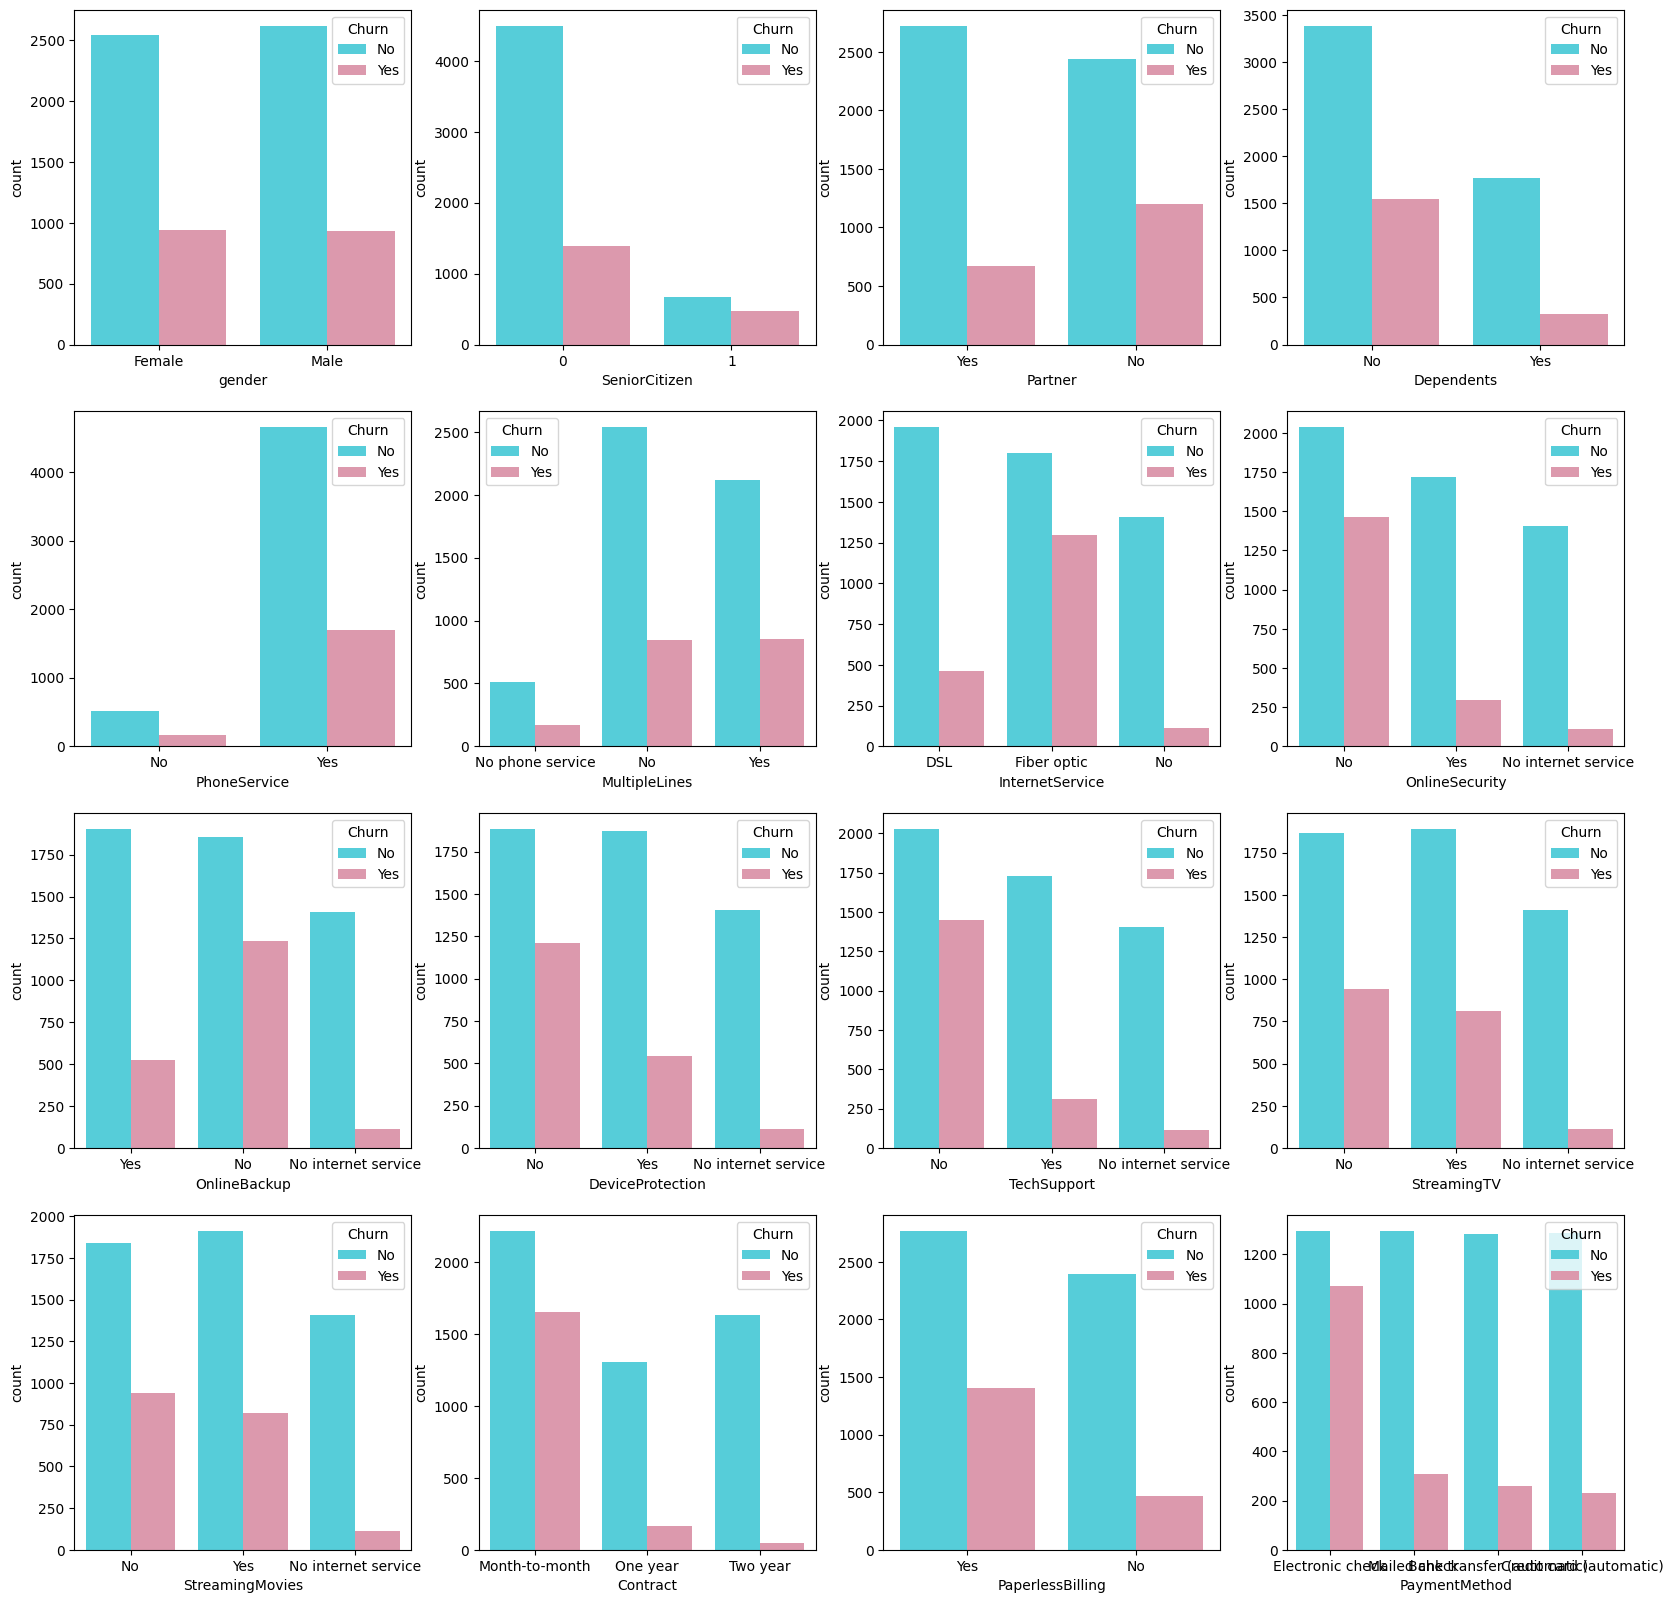

In [18]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i], palette=color_0_1)

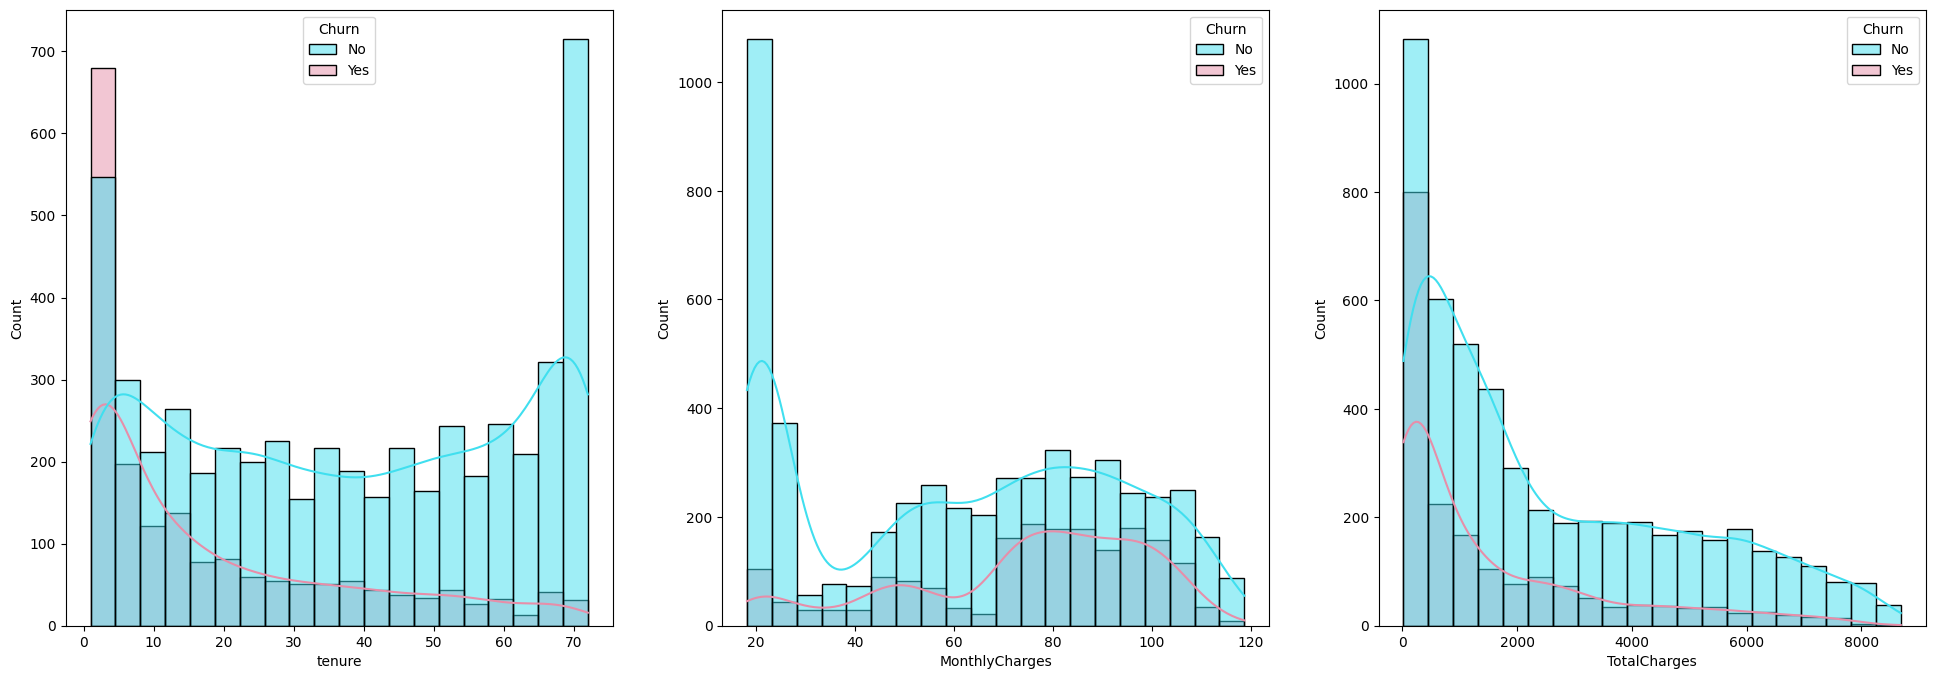

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
for i, p in enumerate(continues_features) :
        sns.histplot(data=df, x=p, ax=ax[i], hue='Churn', bins=20, kde=True, palette=color_0_1)

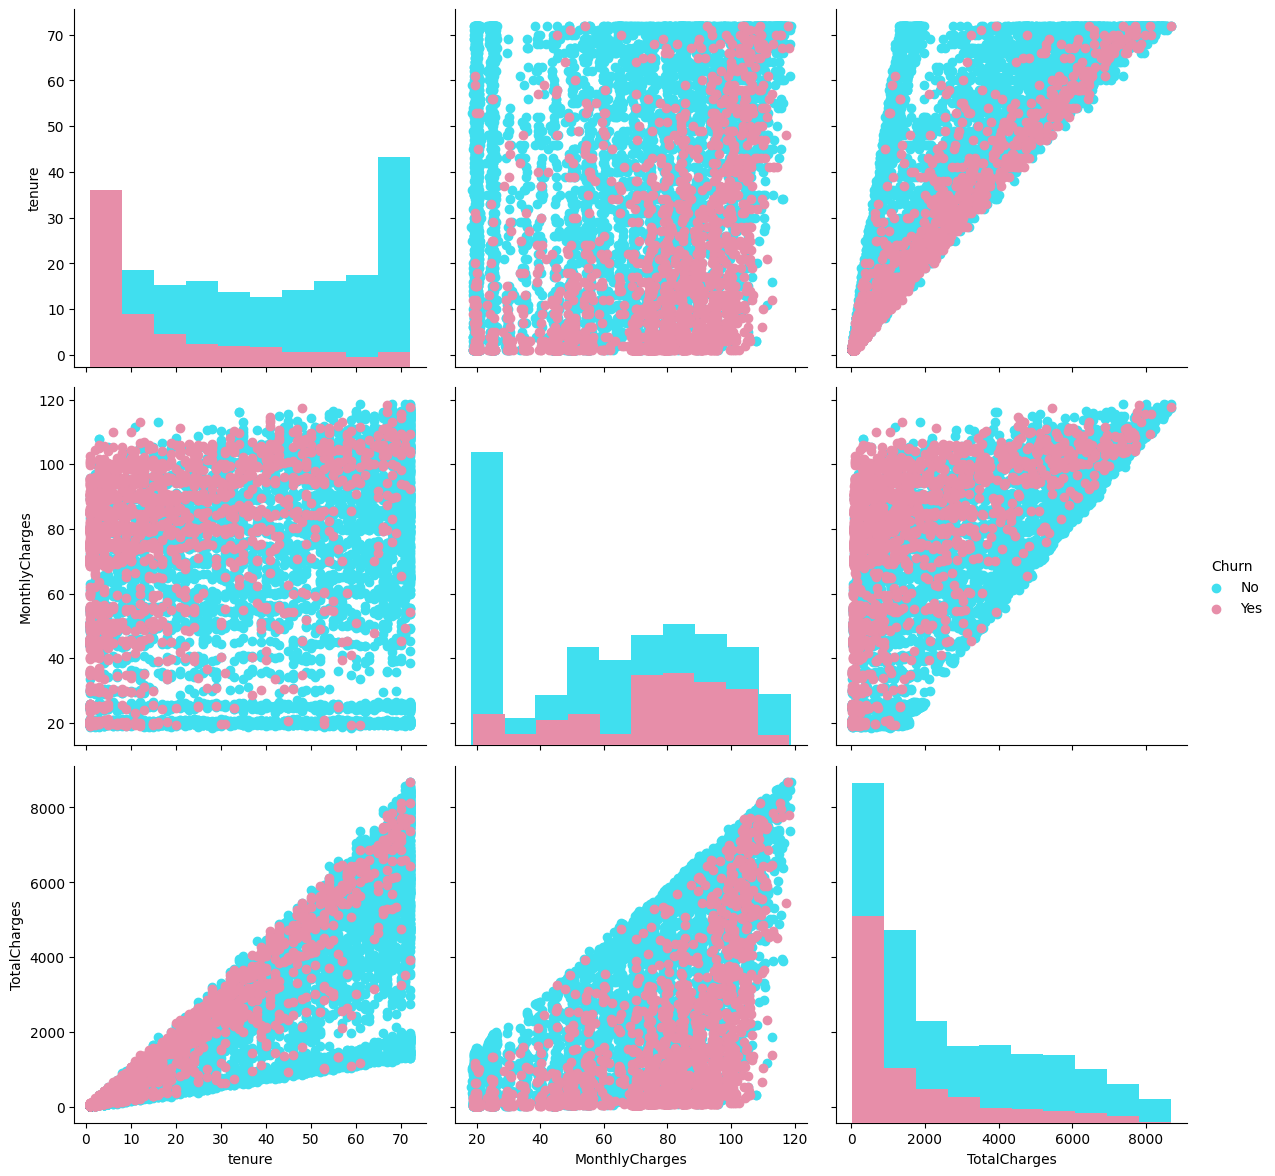

In [20]:
grid = sns.PairGrid(df, hue='Churn', height=4,palette=color_0_1)
grid = grid.map_diag(plt.hist)
grid = grid.map_offdiag(plt.scatter)
grid = grid.add_legend()

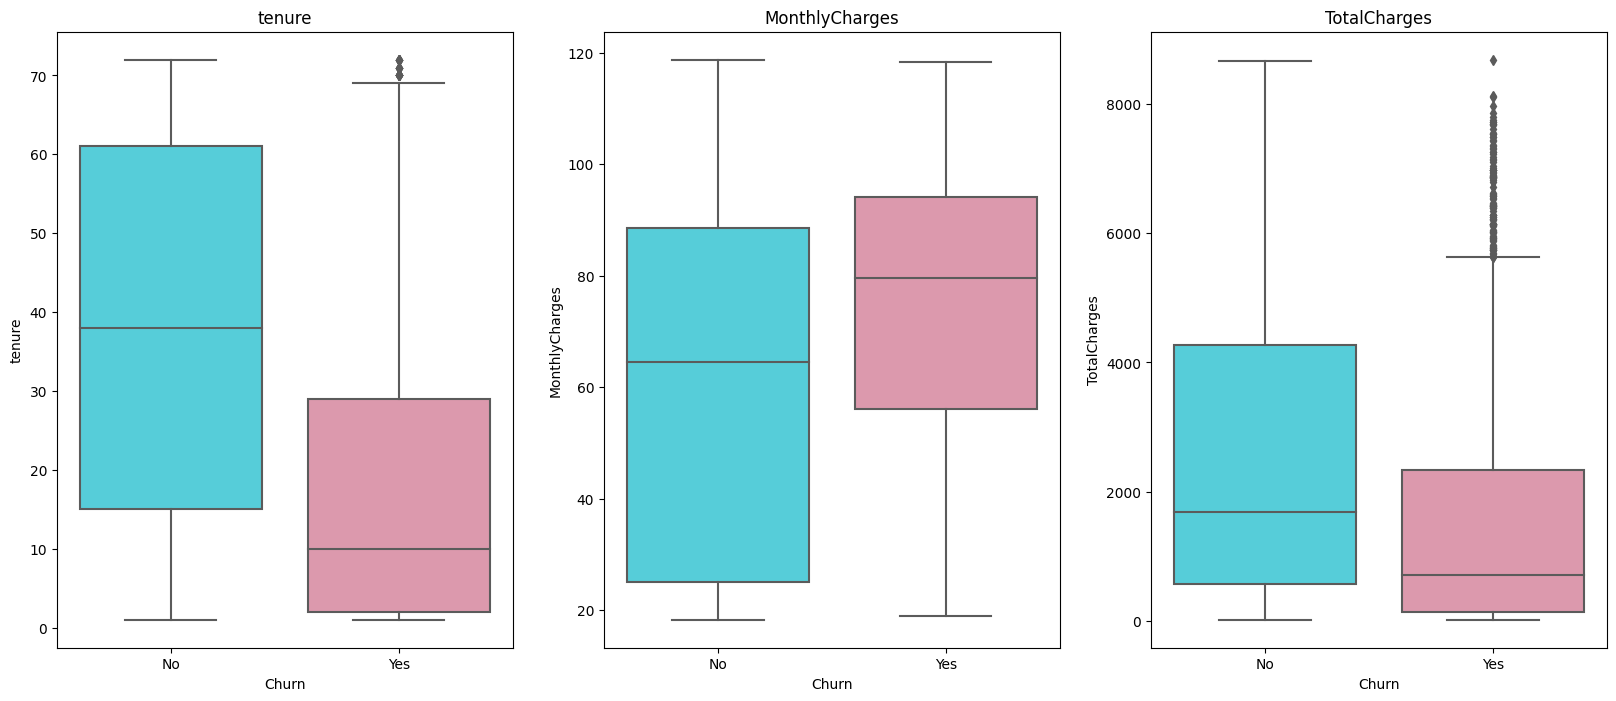

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color_0_1)
        ax[i].set_title(p)

# pearson correlation

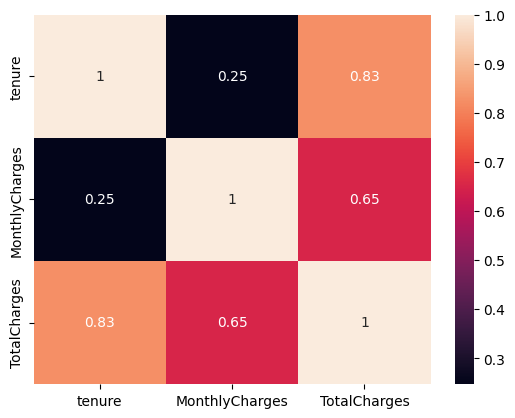

In [22]:
sns.heatmap(data= df.corr(method='pearson'), annot=True)
plt.show()

In [23]:
df.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].mean().round(2)

,MonthlyCharges,tenure,TotalCharges
Churn,,,
No,61.31,37.65,2555.34
Yes,74.44,17.98,1531.80


## data preprocessing

In [24]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)
df.replace('No internet service', 0, inplace=True)
df.replace('No phone service', 0, inplace=True)
df.replace('Fiber optic', 2, inplace=True)
df.replace('DSL',1, inplace=True)
df.replace('Male',1, inplace=True)
df.replace('Female',0, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int64')
df = pd.get_dummies(data=df, columns=['Contract', 'PaymentMethod'])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


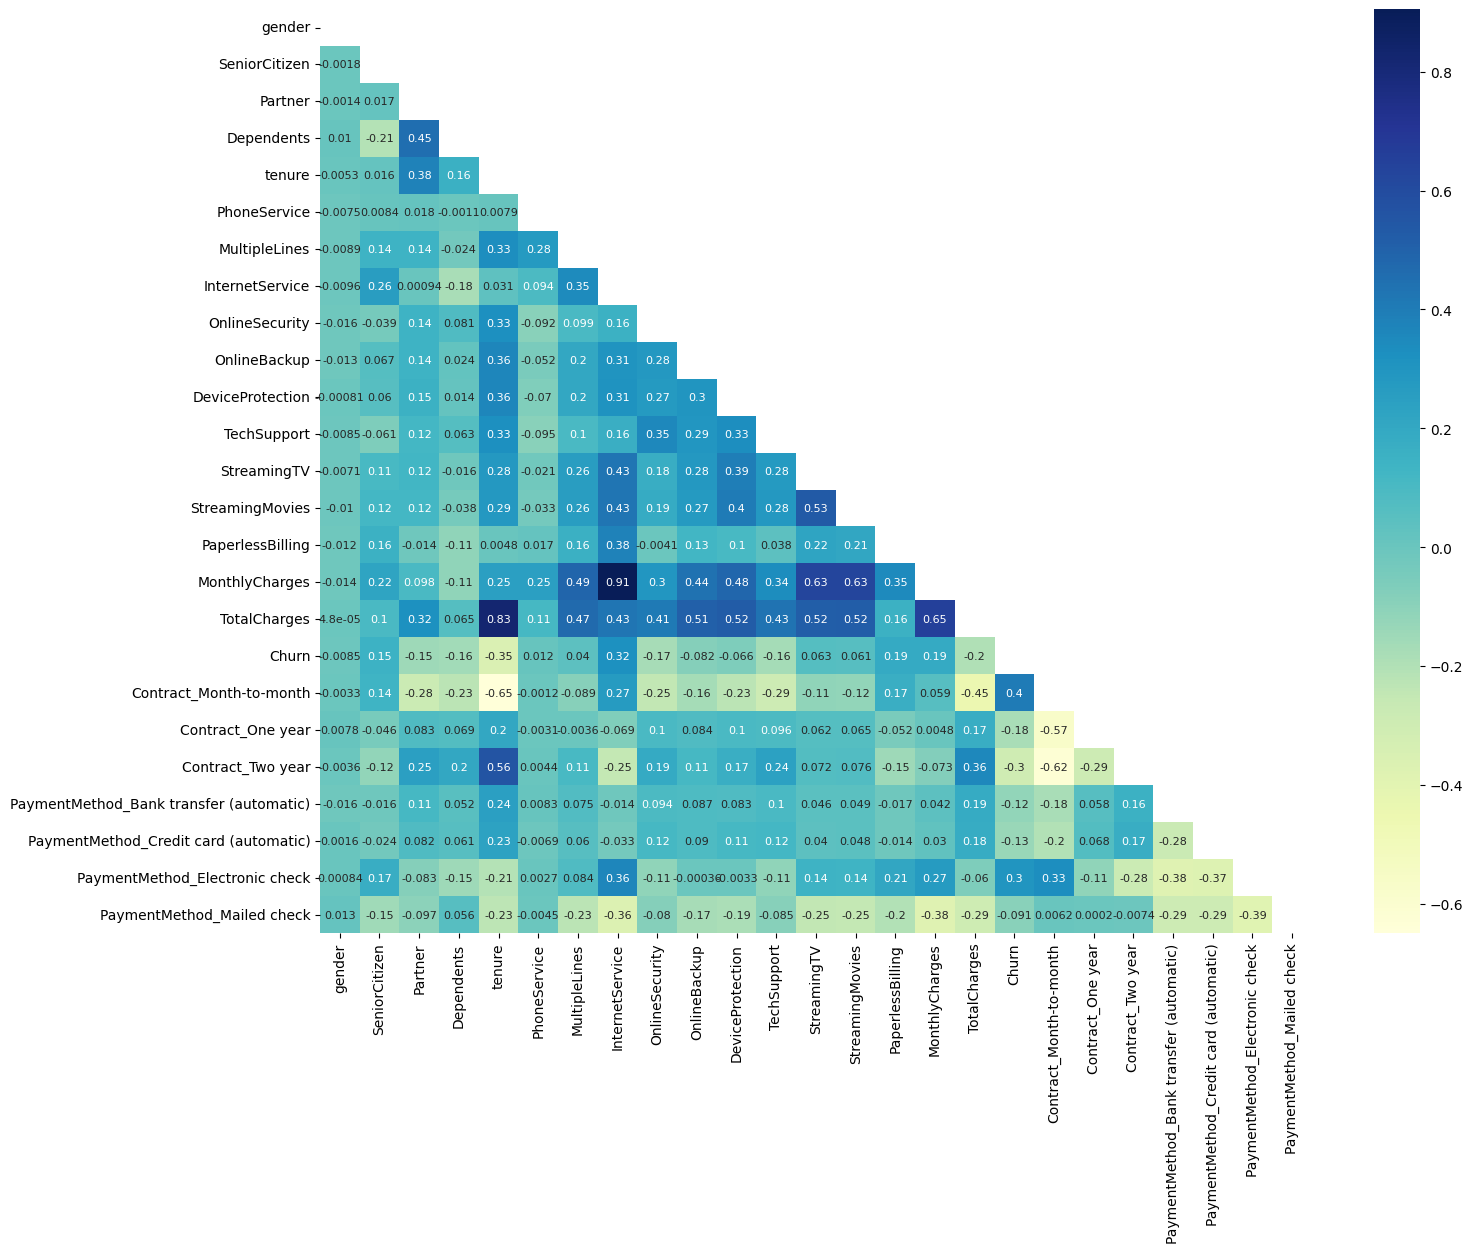

In [26]:
ones = np.ones_like(df.corr())
mask = np.triu(ones)
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), mask=mask,annot=True, cmap="YlGnBu", annot_kws={'fontsize':8});

In [27]:
X = df.drop('Churn', axis=1)
X.sort_index(axis=1, inplace=True)
y = df['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import auc, roc_curve 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [30]:
print(f'x_train Length : {len(x_train)}')
print(f'x_test Length : {len(x_test)}')
print(f'y_train value counts : {y_train.value_counts(normalize=True)}')
print(f'y_test value counts : {y_test.value_counts(normalize=True)}')

x_train Length : 4922
x_test Length : 2110
y_train value counts : 0    0.734254
1    0.265746
Name: Churn, dtype: float64
y_test value counts : 0    0.734123
1    0.265877
Name: Churn, dtype: float64


In [31]:
Scaler = MinMaxScaler()
x_train[continues_features] = Scaler.fit_transform(x_train[continues_features])
x_test[continues_features] = Scaler.transform(x_test[continues_features])
pickle.dump(Scaler, open('scaler.sav', 'wb'))

# Model Creation

In [32]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,\
                             GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
#
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
#
from imblearn.over_sampling import SMOTE 

## over sampling method

In [33]:
x_smote_train = x_train.copy()
y_smote_train = y_train.copy()
x_smote_train, y_smote_train = SMOTE(random_state=123).fit_resample(x_smote_train, y_smote_train) 
print(f'x_train Length : {len(x_train)}')
print(f'x_smote Length : {len(x_smote_train)}')
print(f'y_train value counts : {y_train.value_counts(normalize=True)}')
print(f'y_smote value counts : {y_smote_train.value_counts(normalize=True)}')

x_train Length : 4922
x_smote Length : 7228
y_train value counts : 0    0.734254
1    0.265746
Name: Churn, dtype: float64
y_smote value counts : 0    0.5
1    0.5
Name: Churn, dtype: float64


# support vector machine

In [34]:
svm_model = SVC(C=1, kernel='rbf',gamma=0.1)
svm_model.fit(x_train, y_train)
print(f'Accuracy for train model : {svm_model.score(x_train, y_train)}')
y_pred_t = svm_model.predict(x_train)
y_pred = svm_model.predict(x_test)
print(f'Accuracy for test model : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_train, y_pred_t))
print(classification_report(y_test, y_pred))

Accuracy for train model : 0.8153189760260057
Accuracy for test model : 0.8037914691943128
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3614
           1       0.71      0.52      0.60      1308

    accuracy                           0.82      4922
   macro avg       0.77      0.72      0.74      4922
weighted avg       0.81      0.82      0.81      4922

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.68      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



# svm with smote

In [35]:
svm_model = SVC(C=0.1, kernel='rbf',gamma=0.1)
svm_model.fit(x_smote_train, y_smote_train)
print(f'Accuracy for train model : {svm_model.score(x_smote_train, y_smote_train)}')
y_pred_t = svm_model.predict(x_smote_train)
y_pred = svm_model.predict(x_test)
print(f'Accuracy for test model : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_smote_train, y_pred_t))
print(classification_report(y_test, y_pred))

Accuracy for train model : 0.7818206972883232
Accuracy for test model : 0.761611374407583
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3614
           1       0.76      0.81      0.79      3614

    accuracy                           0.78      7228
   macro avg       0.78      0.78      0.78      7228
weighted avg       0.78      0.78      0.78      7228

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.75      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.76      0.77      2110



## Selecting best classifier models

In [36]:
clf = [AdaBoostClassifier(), RandomForestClassifier(), 
       GradientBoostingClassifier(), XGBClassifier(), 
       StackingClassifier(estimators=[('SVM', svm_model), ('RF', RandomForestClassifier()),
                                      ('XGB', XGBClassifier(gamma=0.001, n_estimators=50))],
                                       final_estimator=LogisticRegression(C=1))]
for model in clf :
    print(f'{model} score :')
    print(f"{cross_val_score(model, x_train, y_train, cv =4, scoring='accuracy').mean()}\n") 

AdaBoostClassifier() score :
0.7998802942944133

RandomForestClassifier() score :
0.7882982306671158

GradientBoostingClassifier() score :
0.8002848170236373

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) score :
0.7742797844306631

StackingClassifier(estimators=[('SVM', SVC(C=0.1, gamma=0.1)),
         

## smote data

In [37]:
clf = [AdaBoostClassifier(), RandomForestClassifier(), 
       GradientBoostingClassifier(), XGBClassifier(), 
       StackingClassifier(estimators=[('SVM', svm_model), ('RF', RandomForestClassifier()),
                                      ('XGB', XGBClassifier(gamma=0.001, n_estimators=50))],
                                       final_estimator=LogisticRegression(C=1))]
for model in clf :
    print(f'{model} score :')
    print(f"{cross_val_score(model, x_smote_train, y_smote_train, cv =4, scoring='f1').mean()}\n")

AdaBoostClassifier() score :
0.7932220034423729

RandomForestClassifier() score :
0.8439290564331018

GradientBoostingClassifier() score :
0.8113388446333939

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) score :
0.8172501421976863

StackingClassifier(estimators=[('SVM', SVC(C=0.1, gamma=0.1)),
         

In [38]:
for model in clf :
    print('Results for : ', model)
    model.fit(x_train, y_train)
    print(f'Accuracy for train data : {model.score(x_train, y_train)}')
    y_pred = model.predict(x_test)
    print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Results for :  AdaBoostClassifier()
Accuracy for train data : 0.8090207232832182
Accuracy for test data : 0.7938388625592417
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Results for :  RandomForestClassifier()
Accuracy for train data : 0.9973587972368956
Accuracy for test data : 0.7928909952606635
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Results for :  GradientBoostingClassifier()
Accuracy for train data : 0.8277123120682649
Acc

In [39]:
## smote data
for model in clf :
    print('Results for : ', model)
    model.fit(x_smote_train, y_smote_train)
    print(f'Accuracy for train data : {model.score(x_smote_train, y_smote_train)}')
    y_pred = model.predict(x_test)
    print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Results for :  AdaBoostClassifier()
Accuracy for train data : 0.8006364139457665
Accuracy for test data : 0.7663507109004739
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1549
           1       0.54      0.78      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.77      0.78      2110

Results for :  RandomForestClassifier()
Accuracy for train data : 0.9982014388489209
Accuracy for test data : 0.7772511848341233
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1549
           1       0.57      0.64      0.61       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.73      2110
weighted avg       0.79      0.78      0.78      2110

Results for :  GradientBoostingClassifier()
Accuracy for train data : 0.8285832872163807
Acc

## getting best parameters


## 1) adaboost

In [40]:
Ada_param = {'n_estimators' : [80, 100, 150],
            'learning_rate': [0.001,0.01, 1]}
Ada_model = AdaBoostClassifier()
ADA_GS = GridSearchCV(Ada_model, Ada_param, cv=3, scoring='accuracy')
ADA_GS.fit(x_smote_train, y_smote_train)
ADA_GS.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [41]:
print(f'Accuracy for train data : {ADA_GS.score(x_smote_train, y_smote_train)}')
y_pred = ADA_GS.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.8094908688433868
Accuracy for test data : 0.7582938388625592
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1549
           1       0.53      0.76      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110



## 2) random forest

In [42]:
rf_param = {'criterion' : ['gini'],
              'n_estimators' : [50, 80, 100],
              'min_samples_split': [5,10],
              'max_depth': [3],
              'max_features': [3,5,7],
              'class_weight':[ {0:0.3, 1:0.7}, {0:0.25, 1:0.75},{0:0.22, 1:0.78}]}

RF_model = RandomForestClassifier(random_state=123)
RF_GS = GridSearchCV(RF_model, rf_param, cv=3, scoring='f1')
RF_GS.fit(x_train, y_train)
print(RF_GS.best_params_)
print(f'Accuracy for train data : {RF_GS.score(x_train, y_train)}')
y_pred = RF_GS.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for train data : 0.6450577663671373
Accuracy for test data : 0.771563981042654
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1549
           1       0.55      0.75      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.80      0.77      0.78      2110



In [43]:
## with smote
rf_param = {'criterion' : ['gini'],
              'n_estimators' : [50, 80, 100],
              'min_samples_split': [5,10],
              'max_depth': [3],
              'max_features': [3,5,7],
              'class_weight':[ {0:0.5, 1:0.5}, {0:0.3, 1:0.7}, {0:0.2, 1:0.8}]}

RF_model_ = RandomForestClassifier(random_state=123)
RF_GS_ = GridSearchCV(RF_model_, rf_param, cv=3, scoring='f1')
RF_GS_.fit(x_smote_train, y_smote_train)
y_train_pred = RF_GS_.predict(x_smote_train)
print(RF_GS_.best_params_)
print(f'Accuracy for train data : {accuracy_score(y_smote_train, y_train_pred)}')
y_pred = RF_GS_.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

{'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 80}
Accuracy for train data : 0.7819590481460985
Accuracy for test data : 0.7464454976303317
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1549
           1       0.51      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



## best praams of random forest

In [44]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 80,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight':{0:0.3, 1:0.7}}

RF_model = RandomForestClassifier(**rf_param, random_state=123)
RF_model.fit(x_train, y_train)
print(f'Accuracy for train data : {RF_model.score(x_train, y_train)}')
y_pred = RF_model.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.778138967899228
Accuracy for test data : 0.7687203791469195
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1549
           1       0.55      0.75      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110



## feature engineering

                                     f_name     f_imp
23                                   tenure  0.185453
0                   Contract_Month-to-month  0.147695
5                           InternetService  0.109395
2                         Contract_Two year  0.107186
6                            MonthlyCharges  0.091488
21                             TotalCharges  0.078809
14           PaymentMethod_Electronic check  0.076035
1                         Contract_One year  0.037165
20                              TechSupport  0.029455
9                            OnlineSecurity  0.029410
10                         PaperlessBilling  0.028667
3                                Dependents  0.016478
11                                  Partner  0.012463
17                            SeniorCitizen  0.008526
13    PaymentMethod_Credit card (automatic)  0.007375
4                          DeviceProtection  0.005819
18                          StreamingMovies  0.005664
12  PaymentMethod_Bank trans

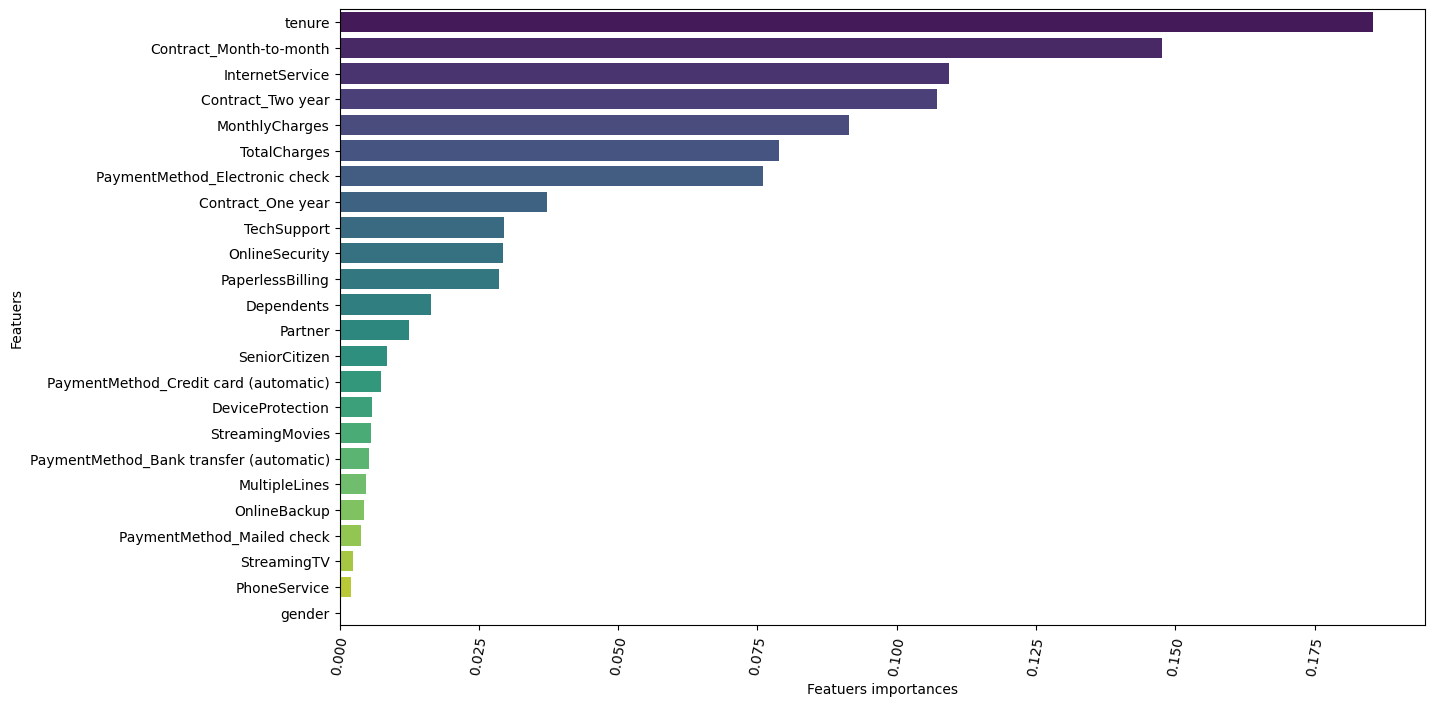

In [45]:
feat_name = X.columns.to_list()
feat_imp = RF_model.feature_importances_
feat_df = pd.DataFrame({'f_name':feat_name, 'f_imp':feat_imp}).sort_values(by='f_imp', ascending=False)
print(feat_df)
plt.figure(figsize=(14,8))
sns.barplot(x='f_imp', y='f_name', data=feat_df, palette='viridis')
plt.xlabel('Featuers importances')
plt.ylabel('Featuers')
plt.xticks(rotation=80);

In [46]:
drop_f = feat_df[feat_df.f_imp<0.001]['f_name'].tolist()
print(drop_f)
new_X = X.loc[:,~X.columns.isin(drop_f)]
x_train_new = x_train.drop(drop_f, axis=1)
x_test_new = x_test.drop(drop_f, axis=1)
print(f'x_train Length : {x_train_new.shape}')
print(f'x_test Length : {x_test_new.shape}')
print(f'y_train value counts : {y_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')

['gender']
x_train Length : (4922, 23)
x_test Length : (2110, 23)
y_train value counts : 0    3614
1    1308
Name: Churn, dtype: int64
y_test value counts : 0    1549
1     561
Name: Churn, dtype: int64


In [47]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 80,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight':{0:0.3, 1:0.7}}

RF_model = RandomForestClassifier(**rf_param, random_state=123)
RF_model.fit(x_train_new, y_train)
print(f'Accuracy for train data : {RF_model.score(x_train_new, y_train)}')
y_pred = RF_model.predict(x_test_new)
y_proba = RF_model.predict_proba(x_test_new)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.76330759853718
Accuracy for test data : 0.7568720379146919
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.78      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110



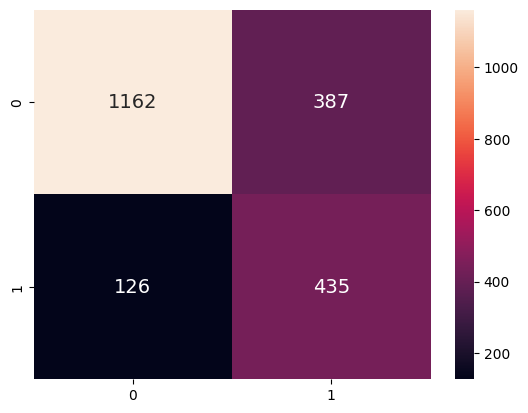

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', annot_kws={'fontsize':14});

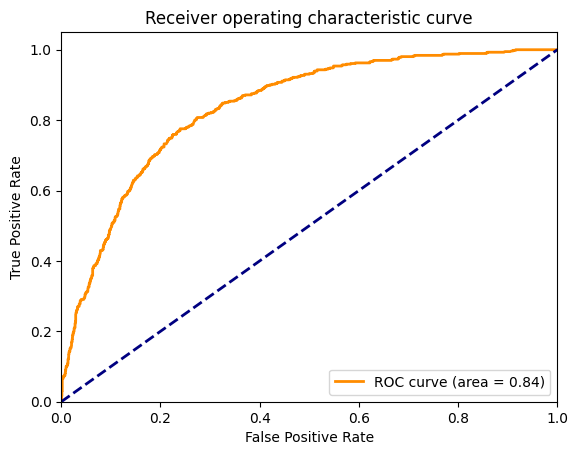

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


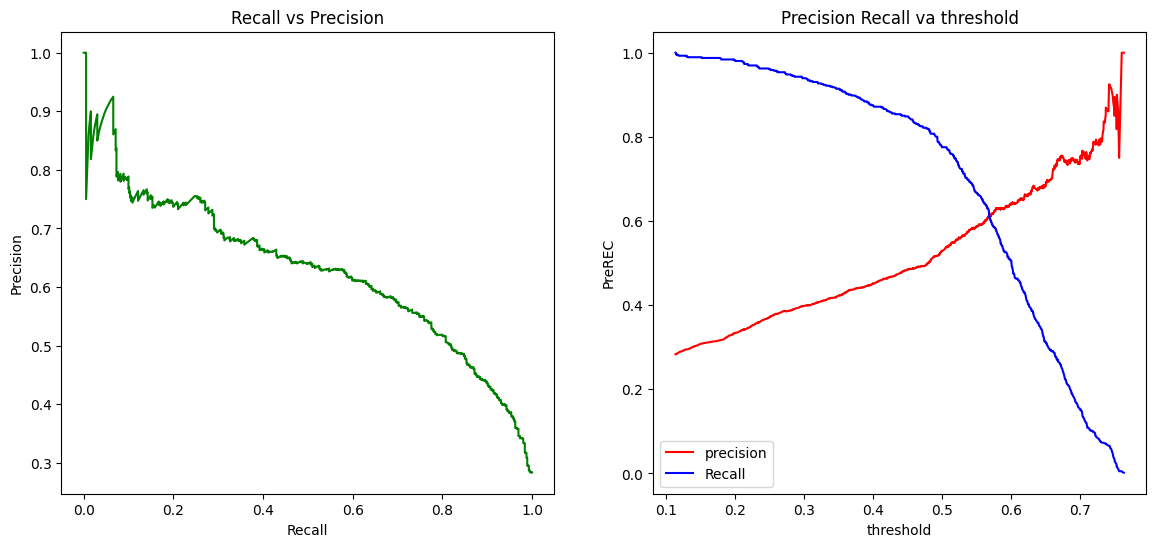

In [50]:
per, rec, thr=precision_recall_curve(y_test, y_proba[:,1])
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(rec, per, c='g')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Recall vs Precision')
#
ax2.plot(thr, per[:-1], c='r', label='precision')
ax2.plot(thr, rec[:-1], c='b', label='Recall')
ax2.set_title('Precision Recall va threshold')
ax2.set_xlabel('threshold')
ax2.set_ylabel('PreREC')
ax2.legend()
plt.show()

In [51]:
pickle.dump(RF_model, open('RF_model.sav', 'wb'))

## model with smote data (feature selection)

In [52]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 100,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight': {0:0.5, 1:0.5}
}

RF_model_ = RandomForestClassifier(**rf_param, random_state=123)
RF_model_.fit(x_smote_train, y_smote_train)
print(f'Accuracy for train data : {RF_model_.score(x_smote_train, y_smote_train)}')
y_pred = RF_model_.predict(x_test)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.780022136137244
Accuracy for test data : 0.7417061611374408
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.81      0.63       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.81      0.74      0.76      2110



                                     f_name     f_imp
23                                   tenure  0.169690
2                         Contract_Two year  0.130953
0                   Contract_Month-to-month  0.124195
5                           InternetService  0.097682
6                            MonthlyCharges  0.083225
14           PaymentMethod_Electronic check  0.064790
9                            OnlineSecurity  0.060562
20                              TechSupport  0.058996
21                             TotalCharges  0.050041
1                         Contract_One year  0.046145
3                                Dependents  0.026685
11                                  Partner  0.023625
10                         PaperlessBilling  0.012415
13    PaymentMethod_Credit card (automatic)  0.010411
15               PaymentMethod_Mailed check  0.008494
8                              OnlineBackup  0.007168
12  PaymentMethod_Bank transfer (automatic)  0.007028
4                          D

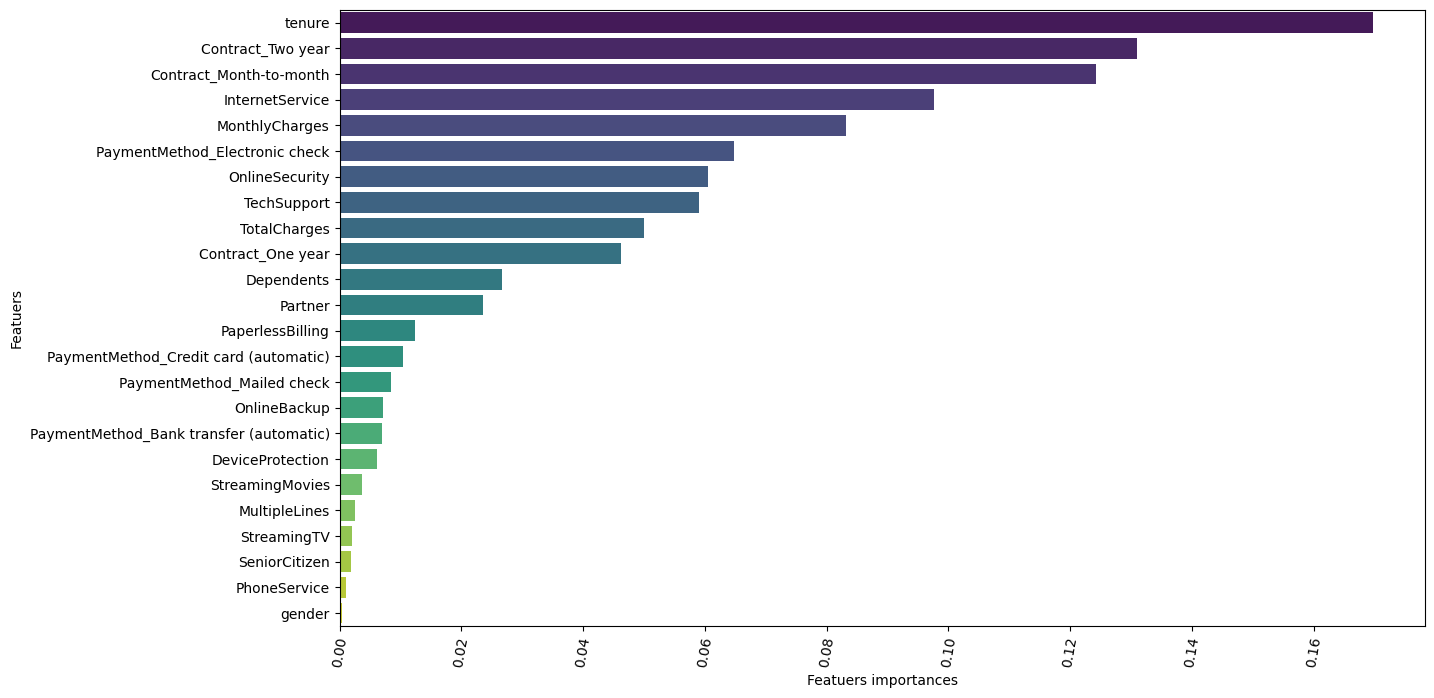

In [53]:
feat_name = X.columns.to_list()
feat_imp = RF_model_.feature_importances_
feat_df = pd.DataFrame({'f_name':feat_name, 'f_imp':feat_imp}).sort_values(by='f_imp', ascending=False)
print(feat_df)
plt.figure(figsize=(14,8))
sns.barplot(x='f_imp', y='f_name', data=feat_df, palette='viridis')
plt.xlabel('Featuers importances')
plt.ylabel('Featuers')
plt.xticks(rotation=80);

In [54]:
drop_f = feat_df[feat_df.f_imp<0.001]['f_name'].tolist()
print(drop_f)
x_smote_train_new = x_smote_train.drop(drop_f, axis=1)
x_test_new = x_test.drop(drop_f, axis=1)
print(f'x_train Length : {x_smote_train_new.shape}')
print(f'x_test Length : {x_test_new.shape}')
print(f'y_train value counts : {y_smote_train.value_counts()}')
print(f'y_test value counts : {y_test.value_counts()}')

['gender']
x_train Length : (7228, 23)
x_test Length : (2110, 23)
y_train value counts : 0    3614
1    3614
Name: Churn, dtype: int64
y_test value counts : 0    1549
1     561
Name: Churn, dtype: int64


In [55]:
rf_param = {'criterion' : 'gini',
              'n_estimators' : 100,
              'min_samples_split': 5,
              'max_depth': 3,
              'max_features': 3,
              'class_weight': {0:0.5, 1:0.5}
}

RF_model_ = RandomForestClassifier(**rf_param, random_state=123)
RF_model_.fit(x_smote_train_new, y_smote_train)
print(f'Accuracy for train data : {RF_model_.score(x_smote_train_new, y_smote_train)}')
y_pred = RF_model_.predict(x_test_new)
print(f'Accuracy for test data : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy for train data : 0.7707526286662977
Accuracy for test data : 0.7270142180094786
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1549
           1       0.49      0.82      0.62       561

    accuracy                           0.73      2110
   macro avg       0.70      0.76      0.70      2110
weighted avg       0.80      0.73      0.74      2110



In [56]:
## clv analysis

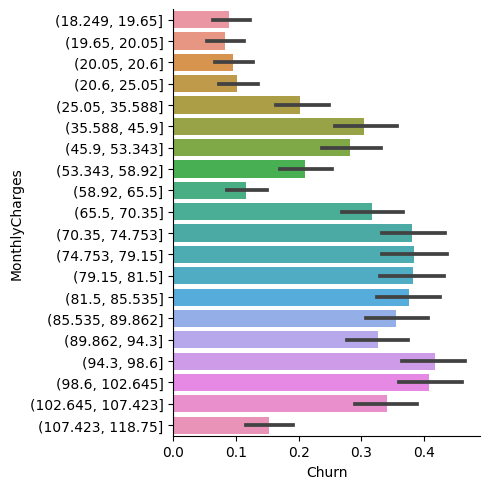

In [57]:
xx = df[['Churn', 'MonthlyCharges']]
xx['MonthlyCharges'] = pd.qcut(df.loc[:,'MonthlyCharges'], 20)
sns.catplot(x='Churn',y='MonthlyCharges' ,data=xx, kind='bar');

In [58]:
pd.qcut(df.loc[:,'MonthlyCharges'], 20)

0          (25.05, 35.588]
1          (53.343, 58.92]
2          (53.343, 58.92]
3           (35.588, 45.9]
4          (70.35, 74.753]
               ...        
7038        (81.5, 85.535]
7039    (102.645, 107.423]
7040       (25.05, 35.588]
7041       (70.35, 74.753]
7042    (102.645, 107.423]
Name: MonthlyCharges, Length: 7032, dtype: category
Categories (20, interval[float64, right]): [(18.249, 19.65] < (19.65, 20.05] < (20.05, 20.6] < (20.6, 25.05] ... (94.3, 98.6] < (98.6, 102.645] < (102.645, 107.423] < (107.423, 118.75]]

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

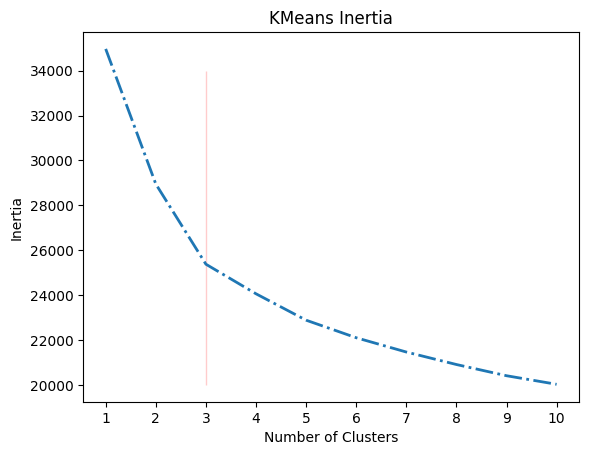

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scal = MinMaxScaler()
X_scal = X.copy()
X_scal[continues_features] = scal.fit_transform(X_scal[continues_features])
clust = list(range(1, 11))
inertia = []

for n in clust:
    model = KMeans(n_clusters=n)
    model.fit(X_scal)
    inert = model.inertia_
    inertia.append(inert)

sns.lineplot(x=clust, y=inertia, linewidth=2, linestyle='-.')
sns.lineplot(x=[3, 3], y=[20000, 34000], color='red', linewidth=3, linestyle='--')
plt.title('KMeans Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clust)
plt.show()


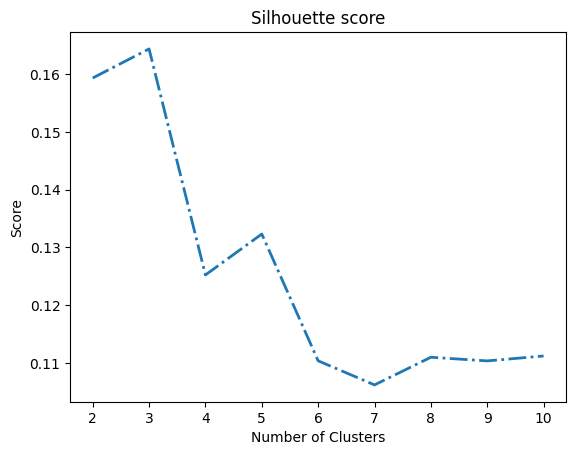

In [64]:
clust = list(range(2,11))
silhoutte = []
for n in clust :
    
    model_km = KMeans(n_clusters=n)
    model_km.fit(X_scal)
    cluster = model_km.labels_
    sil_score = silhouette_score(X_scal, cluster)
    silhoutte.append(sil_score)

sns.lineplot(x=clust,y=silhoutte, linewidth =2, linestyle='-.')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

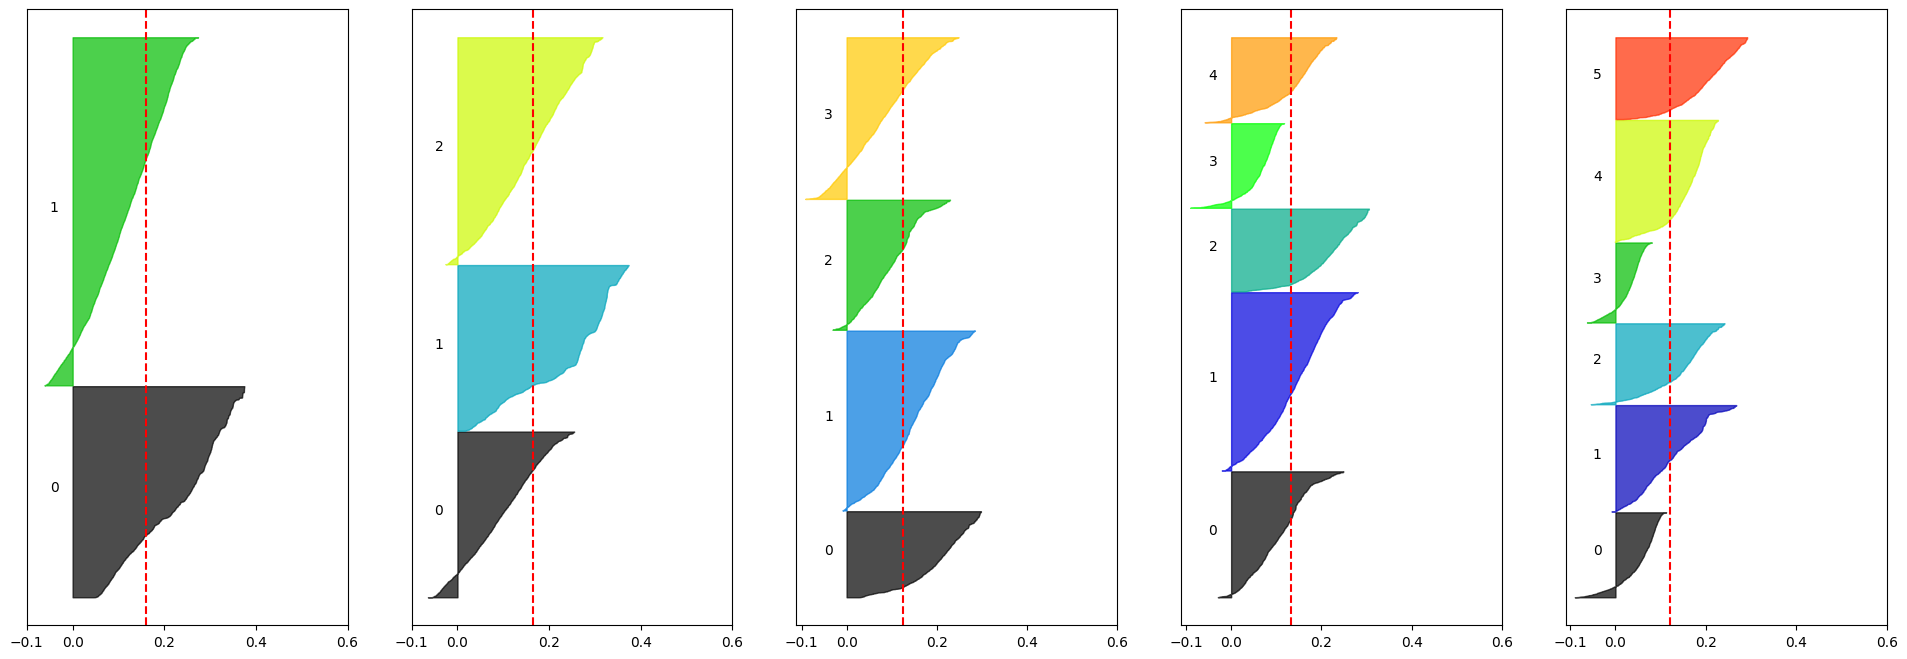

In [65]:
from matplotlib import cm

fig, ax = plt.subplots(1,5, figsize=(24, 8))

for n in range(2, 7) :
    model = KMeans(n_clusters=n)
    model.fit(X_scal)
    label = model.labels_
    silhout_score = silhouette_samples(X_scal, label)
    sil_score = silhouette_score(X_scal, label)

    y_lower = 10
    for i in range(n):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = silhout_score[label == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax[n-2].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax[n-2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    ax[n-2].axvline(x=sil_score, color="red", linestyle="--")        
    ax[n-2].set_yticks([])  # Clear the yaxis labels / ticks
    ax[n-2].set_xticks([-0.1, 0, 0.2, 0.4, 0.6])        

plt.show() 

In [66]:
n = 3
model = KMeans(n_clusters=n, n_init=10,random_state=1234)
model.fit(X_scal)
label = model.labels_
sil_score = silhouette_score(X_scal, label)
print(sil_score)
clust_data = X_scal.copy()
clust_data['label'] = label

0.1643876029259956


## yapplying PCA to the clust_data DataFrame while excluding the 'label' column (the last column) since that column contains cluster labels.

In [68]:
pca_model = PCA(n_components=3)
pca = pca_model.fit_transform(clust_data.iloc[:,:-1])

## This information is useful for determining how many principal components you might want to retain to capture a sufficient amount of information while reducing the dimensionality of your data.

In [71]:
explained_variance = pca_model.explained_variance_

In [72]:
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for PC{i + 1}: {variance}")

Explained Variance for PC1: 1.1606725268972222
Explained Variance for PC2: 0.7758523388855221
Explained Variance for PC3: 0.2892386366367759


In [74]:
pca_arr = np.concatenate((pca, label.reshape(7032,1)), axis=1)
pca_df = pd.DataFrame(pca_arr, columns=['P1', 'P2', 'P3','label'])
pca_df

,P1,P2,P3,label
0,-0.447368,-0.804201,-0.431830,0.0
1,-0.709639,0.364668,1.070366,2.0
2,-0.632199,-0.596752,0.675513,0.0
3,-0.383929,0.777763,1.286745,1.0
4,0.025323,-1.552863,-0.029343,0.0
...,...,...,...,...
7027,0.552405,1.129366,0.101088,1.0
7028,1.561008,0.977742,-0.455420,1.0
7029,-0.560439,-0.488940,-0.788027,0.0
7030,0.098067,-0.995308,-0.557038,0.0


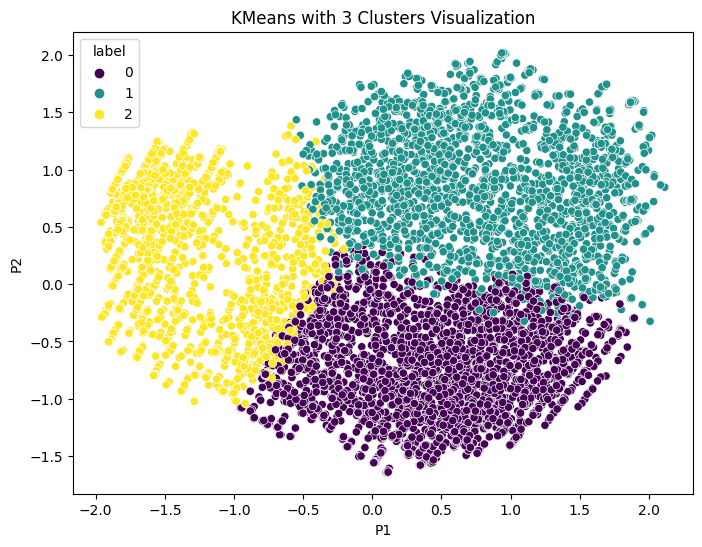

In [75]:
ig = plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['P1'], y=pca_df['P2'], hue=pca_df['label'].astype('int'), data=pca_df, palette='viridis')
plt.title('KMeans with 3 Clusters Visualization')
plt.show()

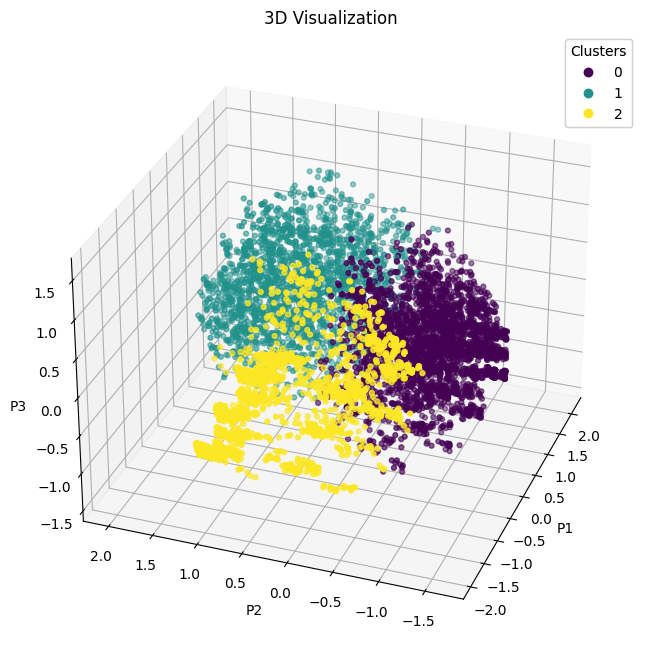

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(pca_df['P1'], pca_df['P2'], pca_df['P3'], c=pca_df['label'], marker=".", s=50 ,cmap='viridis', label=[0,1,2])
ax.set_title('3D Visualization')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
ax.view_init(30, 200)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()

In [77]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [78]:
labeled_df = df.copy()
labeled_df['Clusters'] = label
labeled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Clusters
0,0,0,1,0,1,0,0,1,0,1,...,29.85,0,1,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,1,1,0,...,1889.50,0,0,1,0,0,0,0,1,2
2,1,0,0,0,2,1,0,1,1,1,...,108.15,1,1,0,0,0,0,0,1,0
3,1,0,0,0,45,0,0,1,1,0,...,1840.75,0,0,1,0,1,0,0,0,1
4,0,0,0,0,2,1,0,2,0,0,...,151.65,1,1,0,0,0,0,1,0,0


In [79]:
labeled_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Clusters'],
      dtype='object')

## eda - 2 : regarding the different clustered data

In [80]:
import plotly.express as px

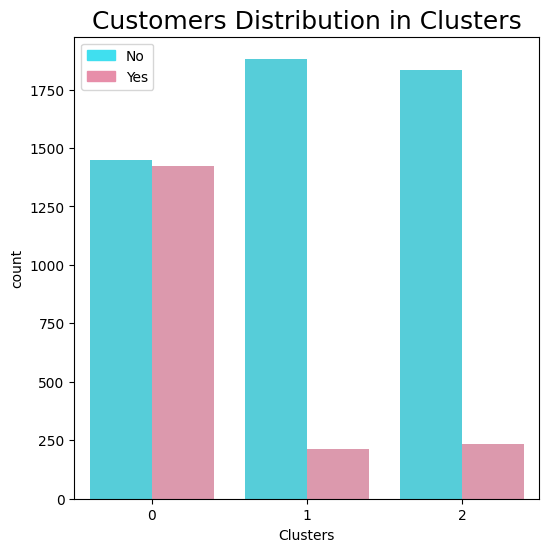

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(data=labeled_df, x='Clusters', hue='Churn', palette=color_0_1)
ax.set_title('Customers Distribution in Clusters', fontdict={'size': 18})
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')


In [83]:
label_churn = labeled_df.groupby('Clusters')['Churn'].value_counts(normalize=True).round(2).to_frame().rename(columns={'Churn': '%Churn'}).reset_index()
label_churn['%Churn'] = label_churn['%Churn'] * 100
label_churn

,Clusters,Churn,%Churn
0,0,0,50.0
1,0,1,50.0
2,1,0,90.0
3,1,1,10.0
4,2,0,89.0
5,2,1,11.0


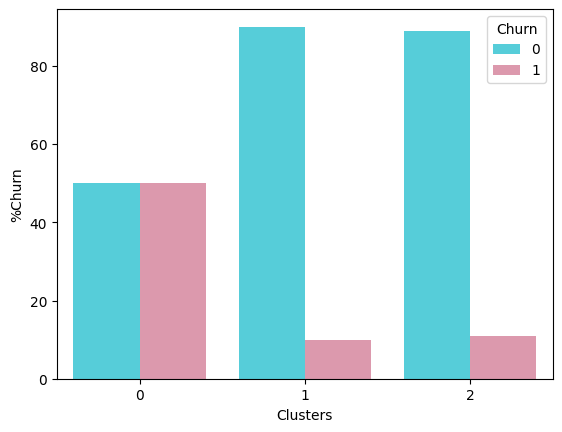

In [86]:
sns.barplot(x='Clusters', y='%Churn', data=label_churn, hue='Churn', palette=color_0_1);

In [87]:
agg_df_MonCharg = labeled_df.groupby(['Churn','Clusters'])['MonthlyCharges'].agg(('count','mean', 'sum')).round()
agg_df_MonCharg.reset_index(inplace=True)
agg_df_MonCharg


,Churn,Clusters,count,mean,sum
0,0,0,1447,75.0,107928.0
1,0,1,1882,85.0,159488.0
2,0,2,1834,27.0,49114.0
3,1,0,1424,78.0,111710.0
4,1,1,212,94.0,19848.0
5,1,2,233,33.0,7573.0


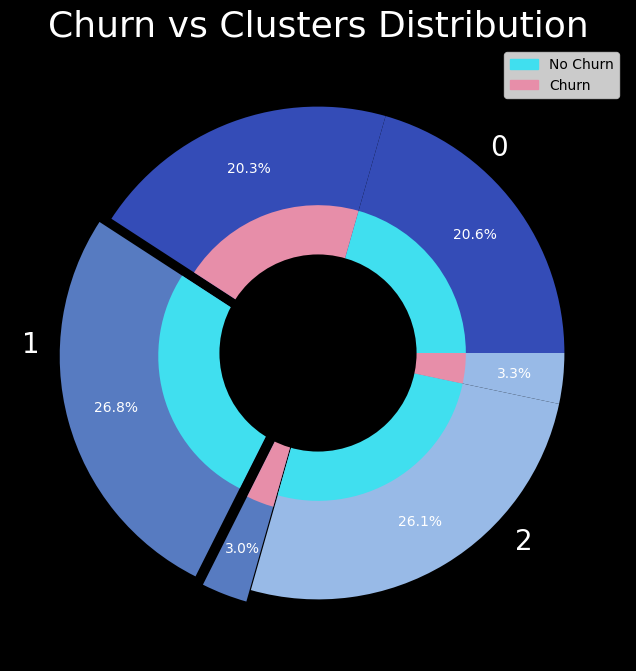

In [89]:
df_MonCharg = agg_df_MonCharg.copy()
df_MonCharg.sort_values(by='Clusters', inplace=True)
# color = ['#9C9EFE','#7895B2','#607EAA', '#182747']
color = ['#577BC1','#344CB7','#98BAE7', '#B8E4F0']
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_facecolor('black')
ax.pie(df_MonCharg['count'], radius=1, colors=sorted(2*color), autopct='%1.1f%%',
       pctdistance=.8, textprops={'color':"white"}, explode=[0,0,.05,.05,0,0])
ax.pie(df_MonCharg['count'],radius=.6, colors=['#40DFEF', '#E78EA9'],explode=[0,0,.05,.05,0,0])
ax.add_artist(plt.Circle((0,0), 0.4, color='white', fc='black', linewidth=0))
ax.set_title('Churn vs Clusters Distribution', color='white',fontsize=26)  
ax.text(x=.7 ,y=.8, s='0',fontsize=20, color='w')     
ax.text(x=-1.2 ,y=0, s='1',fontsize=20, color='w')
ax.text(x=.8 ,y=-.8, s='2',fontsize=20, color='w')
ax.legend(['No Churn', 'Churn']);
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

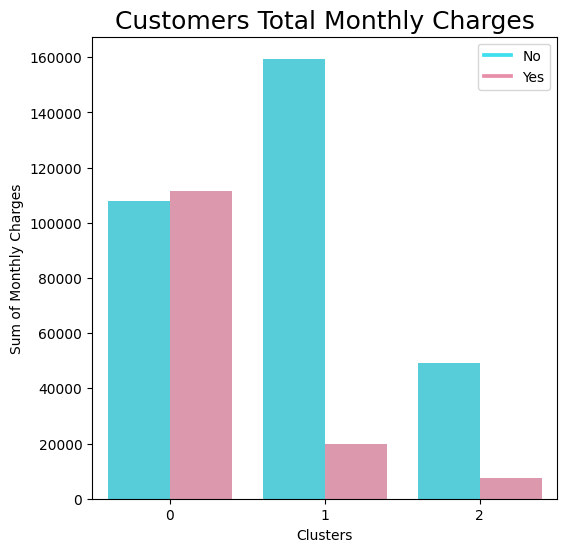

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
fig.set_facecolor('white')
ax = sns.barplot(x='Clusters', y='sum', data= df_MonCharg, hue='Churn', palette=color_0_1)
ax.set_title('Customers Total Monthly Charges', fontdict={'size':18})
ax.set_ylabel('Sum of Monthly Charges')
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

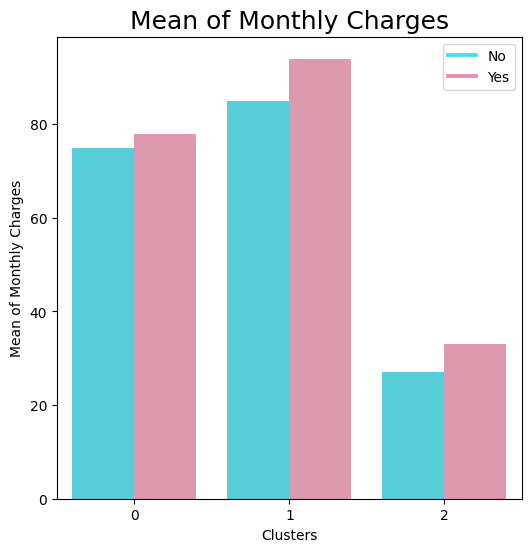

In [91]:
ig, ax = plt.subplots(figsize=(6,6))
fig.set_facecolor('white')
ax = sns.barplot(x='Clusters', y='mean', data= df_MonCharg, hue='Churn', palette=color_0_1)
ax.set_title('Mean of Monthly Charges', fontdict={'size':18})
ax.set_ylabel('Mean of Monthly Charges')
ax.legend(['No', 'Yes'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

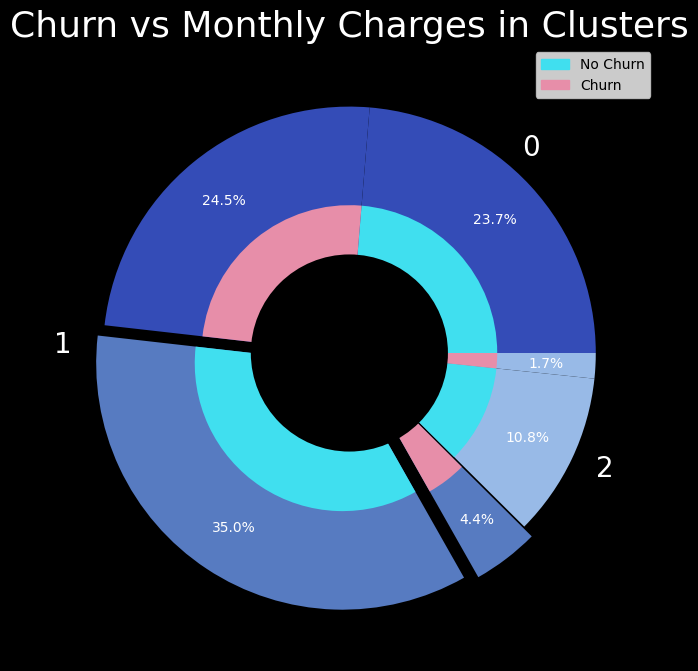

In [92]:
f_MonCharg = agg_df_MonCharg.copy()
df_MonCharg.sort_values(by='Clusters', inplace=True)
# color = ['#9C9EFE','#7895B2','#607EAA', '#182747']
color = ['#577BC1','#344CB7','#98BAE7', '#B8E4F0']
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_facecolor('black')
ax.pie(df_MonCharg['sum'], radius=1, colors=sorted(2*color), autopct='%1.1f%%',
       pctdistance=.8,textprops={'color':"white"}, explode=[0,0,.05,.05,0,0])
ax.pie(df_MonCharg['sum'],radius=.6, colors=['#40DFEF', '#E78EA9'],explode=[0,0,.05,.05,0,0])
ax.add_artist(plt.Circle((0,0), 0.4, color='white', fc='black', linewidth=0))
ax.set_title('Churn vs Monthly Charges in Clusters', color='white',fontsize=26)  
ax.text(x=.7 ,y=.8, s='0',fontsize=20, color='w')     
ax.text(x=-1.2 ,y=0, s='1',fontsize=20, color='w')
ax.text(x=1 ,y=-.5, s='2',fontsize=20, color='w')
ax.legend(['No Churn', 'Churn']);
leg = ax.get_legend()
leg.legendHandles[0].set_color('#40DFEF')
leg.legendHandles[1].set_color('#E78EA9')

In [98]:
import plotly.express as px
import plotly.offline as pyo

# Set Plotly to work in offline mode
pyo.init_notebook_mode(connected=True)

fig = px.bar(
    agg_df_MonCharg, x='Clusters', y='sum',
    color=agg_df_MonCharg['Churn'].astype(str),
    width=500, height=400,
    color_discrete_map={'no': color_0_1[0], 'yes': color_0_1[1]},
    labels={'sum': 'Sum of Monthly Charges', 'color': 'Churn'}
)

# Display the plot
fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Churn=0<br>Clusters=%{x}<br>Sum of Monthly Charges=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([107928., 159488.,  49114.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Churn=1<br>Clusters=%{x}<br>Sum of Monthly Charges=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([111710.,  19848.,   7573.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 400,
               'legend': {'title': {'text': 'Churn'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 500,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Clusters'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sum of Monthly Charges'}}}
})

In [99]:
count_agg_df = labeled_df.groupby(['Churn','Clusters'])[['Contract_Month-to-month', 'Contract_One year',
                                                        'Contract_Two year','InternetService','PaymentMethod_Electronic check', 
                                                        'TechSupport','SeniorCitizen','PaymentMethod_Credit card (automatic)', 'PaperlessBilling']].agg(('sum'))
count_agg_df = count_agg_df.reset_index()
count_agg_df

,Churn,Clusters,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService,PaymentMethod_Electronic check,TechSupport,SeniorCitizen,PaymentMethod_Credit card (automatic),PaperlessBilling
0,0,0,1402.0,42.0,3.0,2370,808.0,316,337,237.0,1054
1,0,1,122.0,795.0,965.0,2758,364.0,1275,262,662.0,1174
2,0,2,696.0,469.0,669.0,427,122.0,139,67,390.0,540
3,1,0,1414.0,9.0,1.0,2568,983.0,171,420,143.0,1156
4,1,1,31.0,140.0,41.0,365,71.0,115,40,60.0,159
5,1,2,210.0,17.0,6.0,120,17.0,24,16,29.0,85


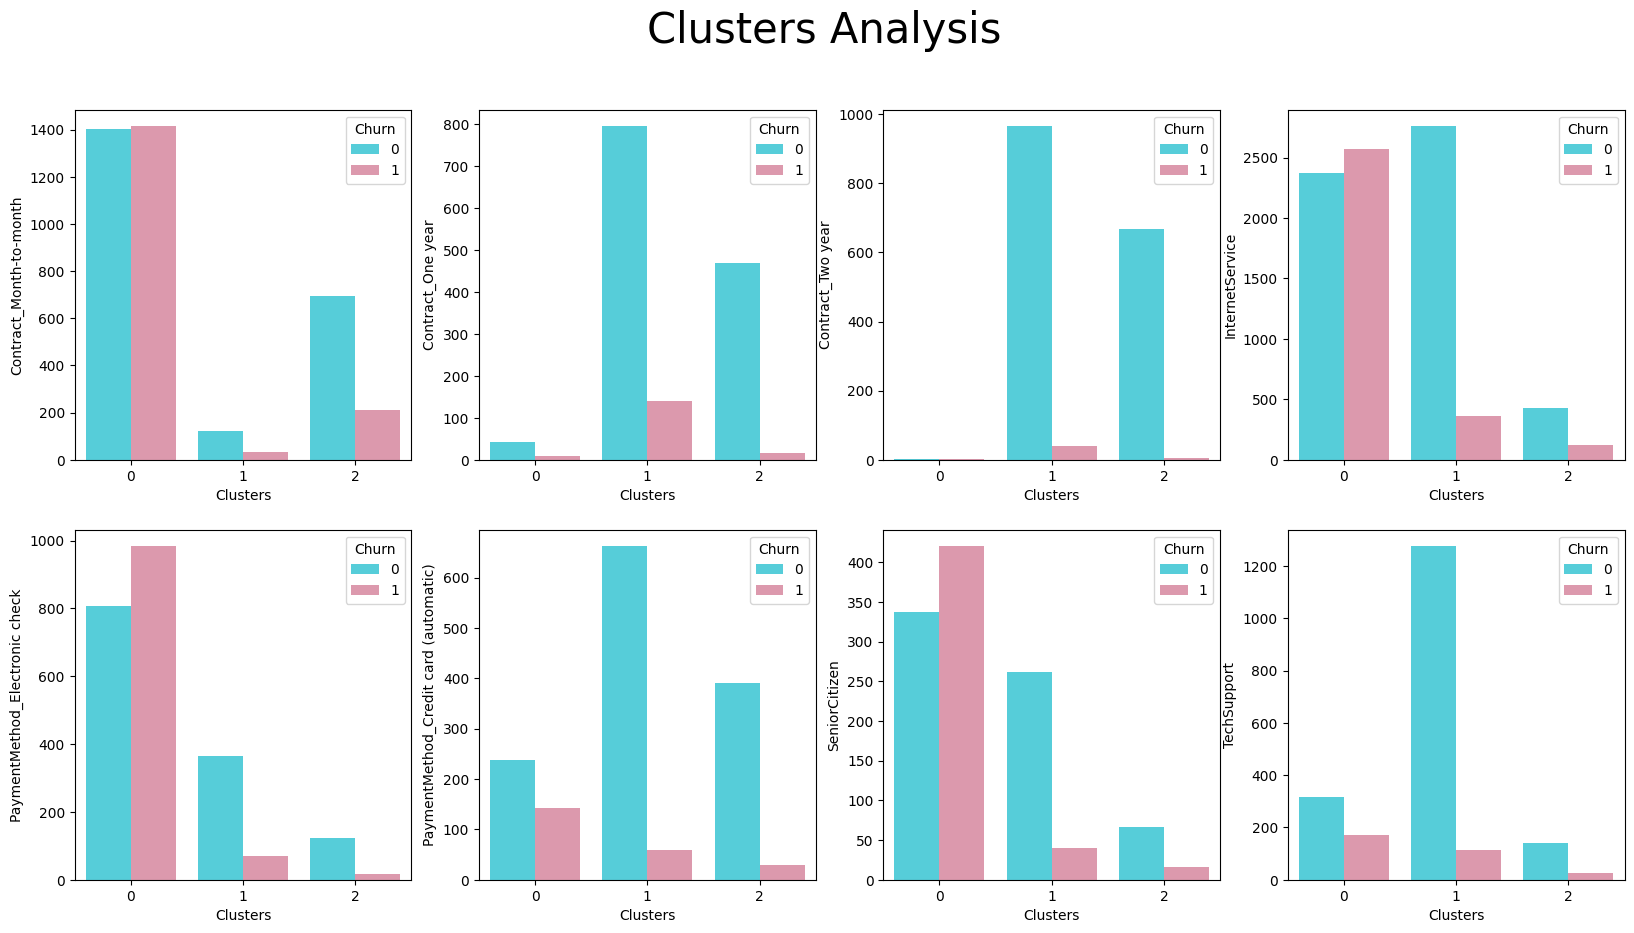

In [100]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.set_palette(color_0_1)

ax = ax.flatten()
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_Month-to-month', hue='Churn', ax=ax[0])
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_One year', hue='Churn', ax=ax[1])
sns.barplot(data=count_agg_df, x='Clusters', y='Contract_Two year', hue='Churn', ax=ax[2])
sns.barplot(data=count_agg_df, x='Clusters', y='InternetService', hue='Churn', ax=ax[3])
sns.barplot(data=count_agg_df, x='Clusters', y='PaymentMethod_Electronic check', hue='Churn', ax=ax[4])
sns.barplot(data=count_agg_df, x='Clusters', y='PaymentMethod_Credit card (automatic)', hue='Churn', ax=ax[5])
sns.barplot(data=count_agg_df, x='Clusters', y='SeniorCitizen', hue='Churn', ax=ax[6])
sns.barplot(data=count_agg_df, x='Clusters', y='TechSupport', hue='Churn', ax=ax[7])
fig.suptitle('Clusters Analysis', fontsize=30)
plt.show()

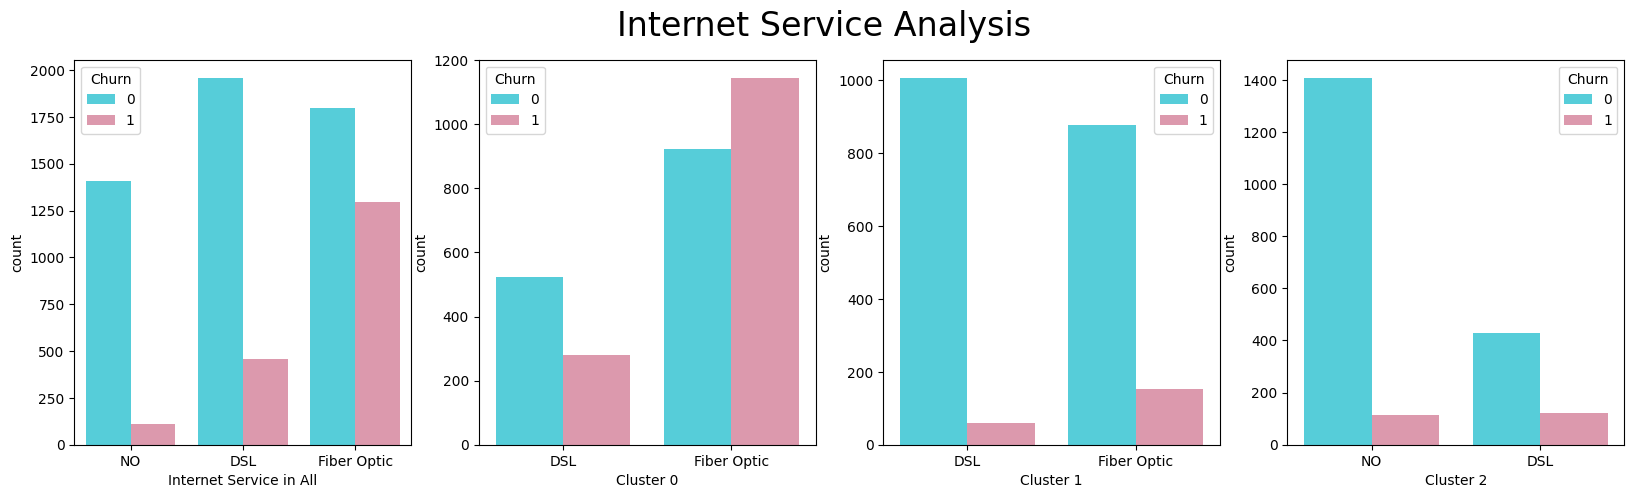

In [101]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.countplot(x='InternetService', data=labeled_df, hue='Churn', ax=ax[0])
ax[0].set_xlabel('Internet Service in All')
ax[0].set_xticks([0, 1, 2], ['NO', 'DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==0], hue='Churn', ax=ax[1])
ax[1].set_xlabel('Cluster 0')
ax[1].set_xticks([ 0, 1], ['DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==1], hue='Churn', ax=ax[2])
ax[2].set_xlabel('Cluster 1')
ax[2].set_xticks([ 0, 1], ['DSL', 'Fiber Optic'])
sns.countplot(x='InternetService', data=labeled_df[labeled_df.Clusters==2], hue='Churn', ax=ax[3])
ax[3].set_xlabel('Cluster 2')
ax[3].set_xticks([ 0, 1], ['NO','DSL'])
fig.suptitle('Internet Service Analysis', fontsize=24);

In [102]:
agg_df_totCharg = labeled_df.groupby(['Churn','Clusters'])['TotalCharges'].agg(('count','mean', 'sum')).round()
agg_df_totCharg.reset_index(inplace=True)
agg_df_totCharg

,Churn,Clusters,count,mean,sum
0,0,0,1447,1875.0,2713560.0
1,0,1,1882,4824.0,9079539.0
2,0,2,1834,763.0,1400143.0
3,1,0,1424,1239.0,1763763.0
4,1,1,212,4908.0,1040409.0
5,1,2,233,252.0,58755.0


In [104]:
import plotly.express as px
import plotly.offline as pyo

# Set Plotly to work in offline mode
pyo.init_notebook_mode(connected=True)

fig = px.bar(
    agg_df_totCharg, x='Clusters', y='sum',
    color=agg_df_totCharg['Churn'].astype(str),
    width=500, height=400,
    color_discrete_map={'0': color_0_1[0], '1': color_0_1[1]},
    title='Sum of Total Charges in Clusters',
    labels={'sum': 'Sum of Total Charges', 'color': 'Churn'}
)

# Display the plot
fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Churn=0<br>Clusters=%{x}<br>Sum of Total Charges=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#40DFEF', 'pattern': {'shape': ''}},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([2713560., 9079539., 1400143.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Churn=1<br>Clusters=%{x}<br>Sum of Total Charges=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#E78EA9', 'pattern': {'shape': ''}},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([1763763., 1040409.,   58755.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 400,
               'legend': {'title': {'text': 'Churn'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sum of Total Charges in Clusters'},
               'width': 500,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Clusters'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sum of Total Charges'}}}
})

In [105]:
agg_df_tenure = labeled_df.groupby(['Churn','Clusters'])['tenure'].agg(('count','mean', 'sum')).round()
agg_df_tenure.reset_index(inplace=True)
agg_df_tenure

,Churn,Clusters,count,mean,sum
0,0,0,1447,24.0,34526
1,0,1,1882,56.0,105305
2,0,2,1834,30.0,54556
3,1,0,1424,15.0,20848
4,1,1,212,51.0,10904
5,1,2,233,8.0,1851


In [106]:
df["Contract_Month-to-month"].value_counts(normalize=True)

1    0.551052
0    0.448948
Name: Contract_Month-to-month, dtype: float64

In [107]:
import plotly.express as px
import plotly.offline as pyo

# Set Plotly to work in offline mode
pyo.init_notebook_mode(connected=True)

fig = px.bar(
    agg_df_tenure, x='Clusters', y='mean',
    color=agg_df_tenure['Churn'].astype(str),
    width=500, height=400,
    color_discrete_map={'0': color_0_1[0], '1': color_0_1[1]},
    barmode='group',  # Set the bar mode to 'group' for grouped bars
    title='Mean of Tenure in Clusters',
    labels={'mean': 'Mean of Tenure', 'color': 'Churn'}
)

# Display the plot
fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Churn=0<br>Clusters=%{x}<br>Mean of Tenure=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#40DFEF', 'pattern': {'shape': ''}},
              'name': '0',
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([24., 56., 30.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Churn=1<br>Clusters=%{x}<br>Mean of Tenure=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#E78EA9', 'pattern': {'shape': ''}},
              'name': '1',
              'offsetgroup': '1',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2], dtype=int64),
              'xaxis': 'x',
              'y': array([15., 51.,  8.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'height': 400,
               'legend': {'title': {'text': 'Churn'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Mean of Tenure in Clusters'},
               'width': 500,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Clusters'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Mean of Tenure'}}}
})